**Week 5 Homework**

Question 1: \
Install Spark and PySpark

Install Spark \
Run PySpark \
Create a local spark session \
Execute spark version \

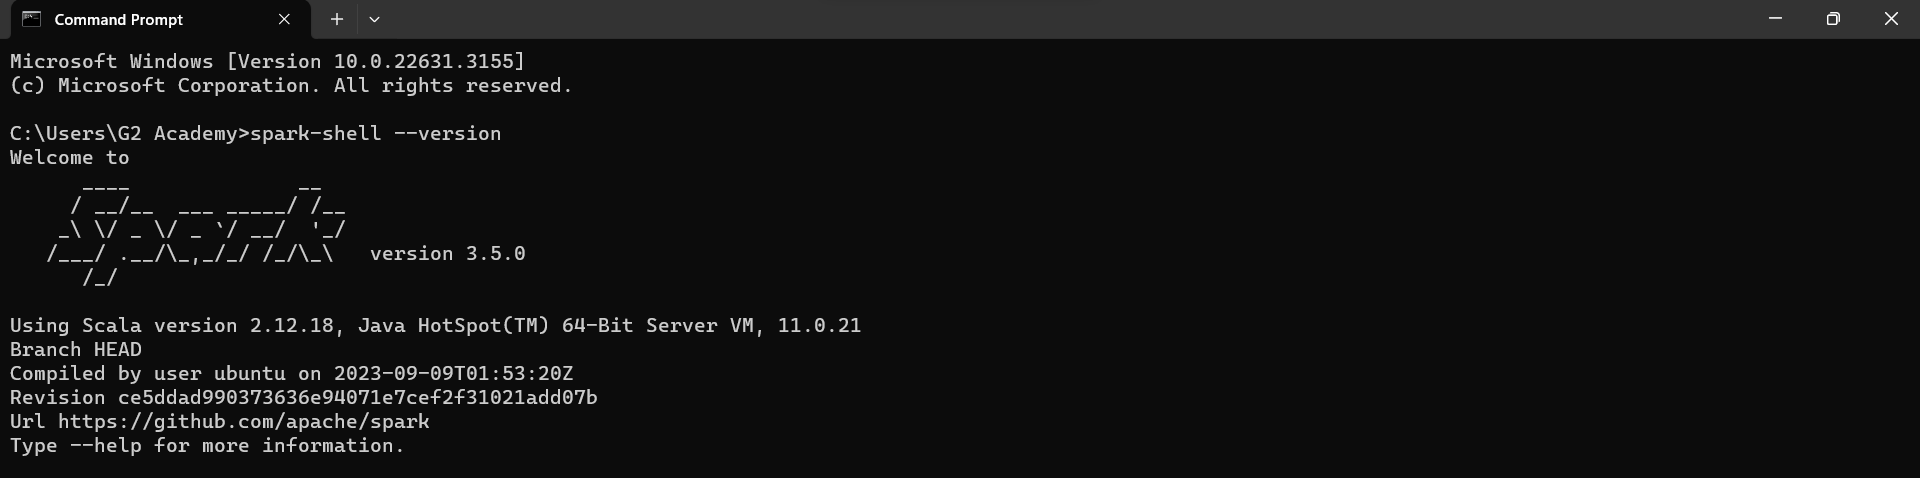

In [ ]:
import os
import tempfile
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import types
from pyspark.sql import functions
from pyspark.sql.types import *

In [ ]:
pyspark.__file__

'c:\\Users\\G2 Academy\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pyspark\\__init__.py'

In [ ]:
spark = SparkSession.builder \
    .master("local[*]") \
    .appName('data-engineering-zoomcamp-batch') \
    .getOrCreate()

In [ ]:
#Download data fhv_tripdata_2019-10.csv.gz
!wget https://github.com/DataTalksClub/nyc-tlc-data/releases/download/fhv/fhv_tripdata_2019-10.csv.gz

In [ ]:
schema = StructType ([
         StructField("dispatching_base_num",StringType(), True),
         StructField("pickup_datetime", TimestampType(), True),
         StructField("dropoff_datetime", TimestampType(), True),
         StructField("PUlocationID", IntegerType(), True),
         StructField("DOlocationID", IntegerType(), True),
         StructField("SR_Flag", IntegerType(), True),
         StructField("Affiliated_base_number", StringType(), True),
        ])

In [ ]:
file_path = "C:/Users/G2 Academy/OneDrive/Desktop/data-engineering-zoomcamp-2024/05-batch/code_spark/source/fhv_tripdata_2019-10.csv.gz"

df = spark.read.csv(file_path, header=True, schema=schema)

df.printSchema()
df.show(truncate=False)

root
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PUlocationID: integer (nullable = true)
 |-- DOlocationID: integer (nullable = true)
 |-- SR_Flag: integer (nullable = true)
 |-- Affiliated_base_number: string (nullable = true)

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|pickup_datetime    |dropoff_datetime   |PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|B00009              |2019-10-01 00:23:00|2019-10-01 00:35:00|264         |264         |NULL   |B00009                |
|B00013              |2019-10-01 00:11:29|2019-10-01 00:13:22|264         |264         |NULL   |B00013                |
|B00014              |2019-10-01 00:11:43|2019-10-01 00:3

In [ ]:
with tempfile.TemporaryDirectory() as data:

    df.write.parquet(data, mode="overwrite")

Question 2: \
FHV October 2019

Read the October 2019 FHV into a Spark Dataframe with a schema as we did in the lessons.

Repartition the Dataframe to 6 partitions and save it to parquet.

What is the average size of the Parquet (ending with .parquet extension) Files that were created (in MB) ?

Size data to save parquet is 25 MB

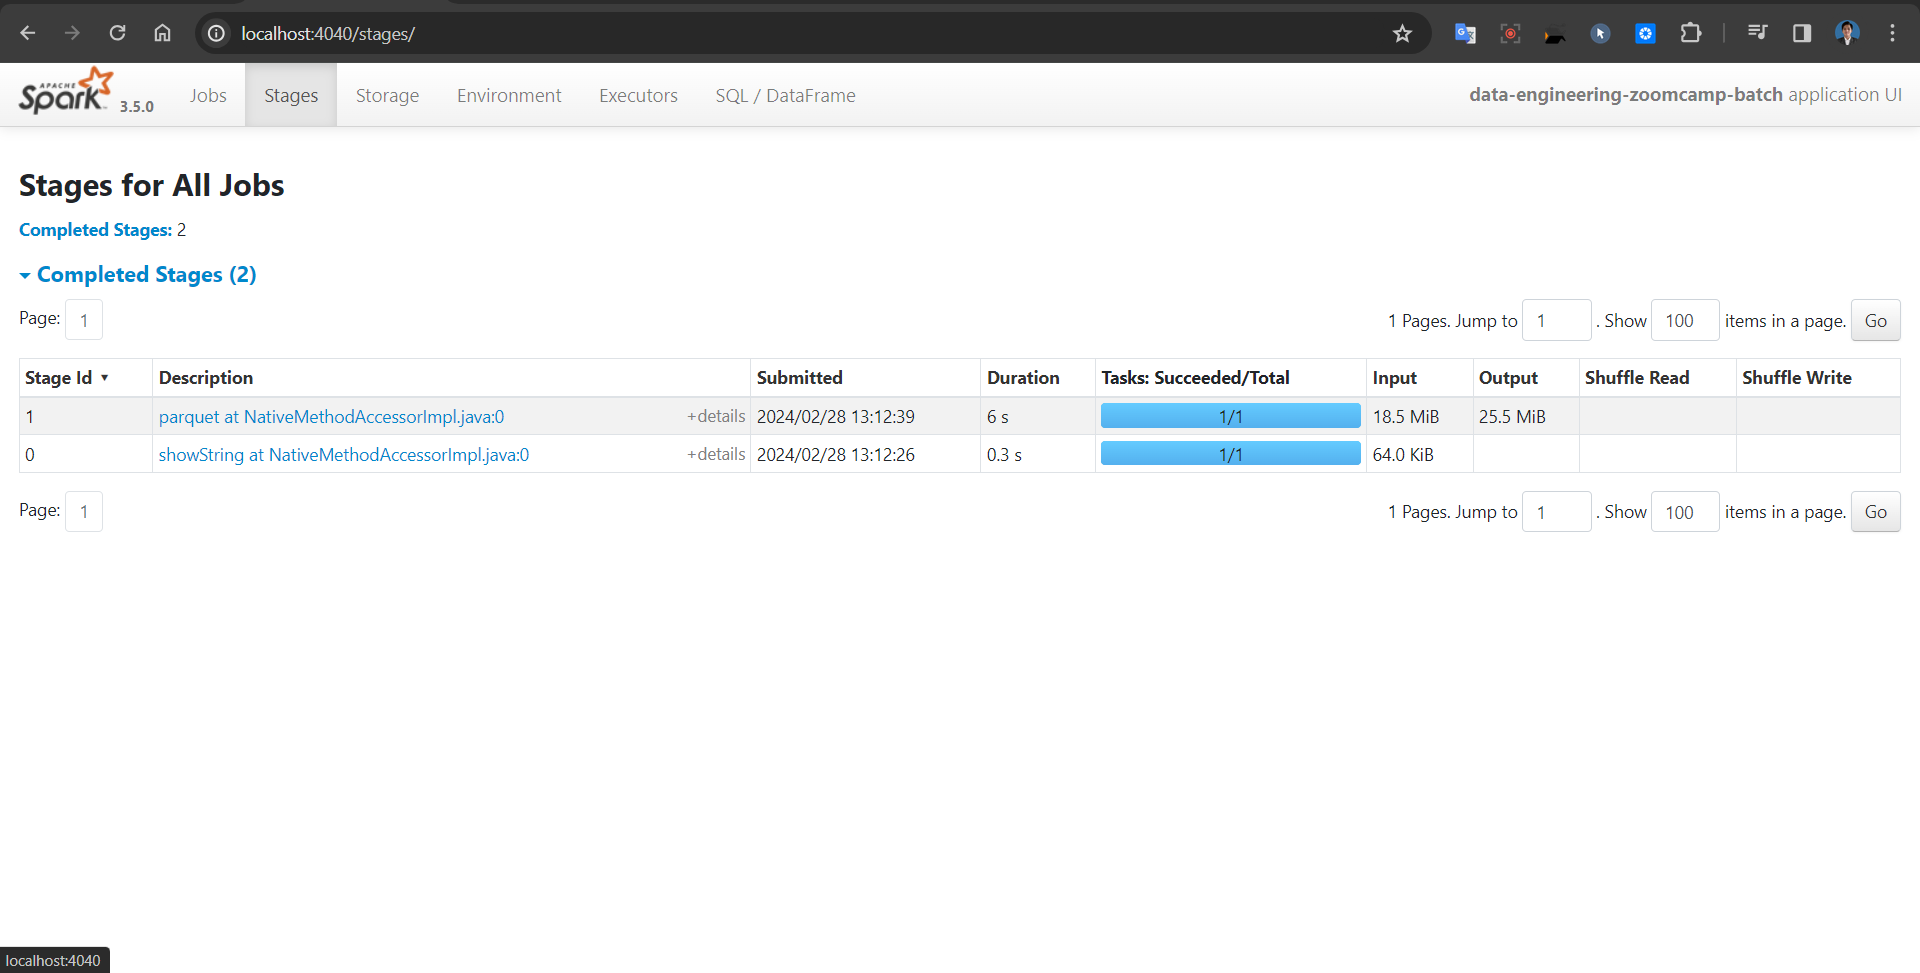

In [ ]:
spark.read.option("header",True) \
          .csv(file_path) \
          .createOrReplaceTempView("fhv_tripdata_2019_10")

In [ ]:
spark.sql("SELECT * \
          FROM fhv_tripdata_2019_10") \
     .show()

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|    pickup_datetime|   dropOff_datetime|PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|              B00009|2019-10-01 00:23:00|2019-10-01 00:35:00|         264|         264|   NULL|                B00009|
|              B00013|2019-10-01 00:11:29|2019-10-01 00:13:22|         264|         264|   NULL|                B00013|
|              B00014|2019-10-01 00:11:43|2019-10-01 00:37:20|         264|         264|   NULL|                B00014|
|              B00014|2019-10-01 00:56:29|2019-10-01 00:57:47|         264|         264|   NULL|                B00014|
|              B00014|2019-10-01 00:23:09|2019-10-01 00:28:27|         264|         264|   NULL|                B00014|
|     B00021         |2019-10-01 00:00:4

In [ ]:
"""
Question 3:
Count records

How many taxi trips were there on the 15th of October ?
"""

spark.sql("SELECT COUNT(*) as total_taxi_trips_on_the_15th_of_October \
          FROM fhv_tripdata_2019_10 \
          WHERE DATE(pickup_datetime) = '2019-10-15' ") \
     .show()

+---------------------------------------+
|total_taxi_trips_on_the_15th_of_October|
+---------------------------------------+
|                                  62610|
+---------------------------------------+



In [ ]:
"""
Question 4:
Longest trip for each day

What is the length of the longest trip in the dataset in hours ?
"""

spark.sql("SELECT dispatching_base_num, \
          MAX(TIMESTAMPDIFF(HOUR, pickup_datetime, dropoff_datetime)) as the_longest_trip_in_hours \
          FROM fhv_tripdata_2019_10 \
          GROUP BY dispatching_base_num \
          ORDER BY the_longest_trip_in_hours DESC") \
     .show()

+--------------------+-------------------------+
|dispatching_base_num|the_longest_trip_in_hours|
+--------------------+-------------------------+
|              B02832|                   631152|
|              B02416|                    87672|
|     B00746         |                    70128|
|              B02921|                     8794|
|              B03110|                     8784|
|              B03080|                     1464|
|     B03084         |                     1056|
|              B01452|                      793|
|              B00972|                      792|
|              B02418|                      745|
|              B01455|                      744|
|              B02732|                      604|
|              B02532|                      469|
|              B02546|                      432|
|              B01985|                      398|
|              B03184|                      355|
|              B03107|                      266|
|              B0203

Question 5: \
User Interface

Sparks User Interface which shows the application's dashboard runs on which local port ?

http://localhost:4040/

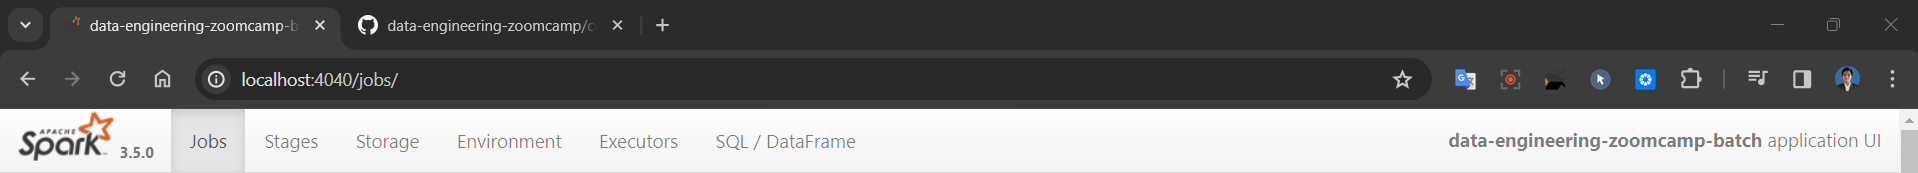

In [ ]:
#Download data taxi_zone_lookup.csv
!wget https://github.com/DataTalksClub/nyc-tlc-data/releases/download/misc/taxi_zone_lookup.csv

In [ ]:
schema_zone = StructType ([
              StructField("LocationID",IntegerType(), True),
              StructField("Borough", StringType(), True),
              StructField("Zone", StringType(), True),
              StructField("service_zone", StringType(), True),
            ])

In [ ]:
file_zone_path = "C:/Users/G2 Academy/OneDrive/Desktop/data-engineering-zoomcamp-2024/05-batch/code_spark/source/taxi_zone_lookup.csv"

df_zone = spark.read.csv(file_zone_path, header=True, schema=schema_zone)

df_zone.printSchema()
df_zone.show(truncate=False)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)

+----------+-------------+-----------------------+------------+
|LocationID|Borough      |Zone                   |service_zone|
+----------+-------------+-----------------------+------------+
|1         |EWR          |Newark Airport         |EWR         |
|2         |Queens       |Jamaica Bay            |Boro Zone   |
|3         |Bronx        |Allerton/Pelham Gardens|Boro Zone   |
|4         |Manhattan    |Alphabet City          |Yellow Zone |
|5         |Staten Island|Arden Heights          |Boro Zone   |
|6         |Staten Island|Arrochar/Fort Wadsworth|Boro Zone   |
|7         |Queens       |Astoria                |Boro Zone   |
|8         |Queens       |Astoria Park           |Boro Zone   |
|9         |Queens       |Auburndale             |Boro Zone   |
|10        |Queens       |Baisley Park           |Boro Zone   |


In [ ]:
spark.read.option("header",True) \
          .csv(file_zone_path) \
          .createOrReplaceTempView("taxi_zone_lookup")

In [ ]:
spark.sql("SELECT * \
          FROM taxi_zone_lookup") \
     .show()

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
|        11|     Brooklyn|          Bath Beach|   Boro Zone|
|        12|    Manhattan|        Battery Park| Yellow Zone|
|        13|    Manhattan|   Battery Park City| Yellow Zone|
|        14|     Brookly

In [ ]:
"""
Question 6:
Least frequent pickup location zone

Load the zone lookup data into a temp view in Spark
Zone Data

Using the zone lookup data and the FHV October 2019 data, what is the name of the LEAST frequent pickup location Zone ?
"""

spark.sql("SELECT zones.Zone, COUNT(trips.PUlocationID) as total_pickup_location \
          FROM fhv_tripdata_2019_10 as trips \
          INNER JOIN taxi_zone_lookup as zones \
          ON trips.PUlocationID = zones.LocationID \
          GROUP BY zones.Zone \
          ORDER BY total_pickup_location ASC ") \
     .show()

+--------------------+---------------------+
|                Zone|total_pickup_location|
+--------------------+---------------------+
|         Jamaica Bay|                    1|
|Governor's Island...|                    2|
| Green-Wood Cemetery|                    5|
|       Broad Channel|                    8|
|     Highbridge Park|                   14|
|        Battery Park|                   15|
|Saint Michaels Ce...|                   23|
|Breezy Point/Fort...|                   25|
|Marine Park/Floyd...|                   26|
|        Astoria Park|                   29|
|    Inwood Hill Park|                   39|
|       Willets Point|                   47|
|Forest Park/Highl...|                   53|
|  Brooklyn Navy Yard|                   57|
|        Crotona Park|                   62|
|        Country Club|                   77|
|     Freshkills Park|                   89|
|       Prospect Park|                   98|
|     Columbia Street|                  105|
|  South W